In [1115]:
import pandas as pd
import os  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [1116]:
cwd = os.getcwd()
print(cwd)

/Users/Reinhard/702_Statistical_Modelling_Final_Project


In [1117]:
os.chdir('/Users/Reinhard/702_Statistical_Modelling_Final_Project')#更改路径，''里面为更改的路径
 
print(os.getcwd())#显示当前路径

/Users/Reinhard/702_Statistical_Modelling_Final_Project


In [1118]:
df = pd.read_csv("/Users/Reinhard/702_Statistical_Modelling_Final_Project/dataset/raw_haidian.csv")

In [1119]:
df.head()

,Unnamed: 0,Housing ID,Livable Area,Price/Square Meter,Price,Transaction Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号 2室1厅 56.3平米,56.3平米,38544.0,217.0,2015-05-08,1965年建板楼,2室1厅,南 北,低楼层(共3层),简装
1,2,中关村南大街甲3号 2室1厅 55.1平米,55.1平米,33667.0,185.5,2012-04-10,1965年建板楼,2室1厅,南 北,底层(共3层),其他
2,3,民族大学南路19号院 2室1厅 70平米,70平米,91429.0,640.0,2019-04-19,1993年建板塔结合,2室1厅,南,中楼层(共15层),简装
3,4,民族大学南路19号院 2室1厅 98.49平米,98.49平米,102752.0,1012.0,2019-04-07,2000年建塔楼,2室1厅,南,高楼层(共18层),简装
4,5,民族大学南路19号院 2室1厅 60.7平米,60.7平米,98847.0,600.0,2019-02-22,1991年建板塔结合,2室1厅,南,高楼层(共16层),其他


In [1120]:
df.columns

Index(['Unnamed: 0', 'Housing ID', 'Livable Area', 'Price/Square Meter',
       'Price', 'Transaction Date', 'Year Built', 'Floor Plan',
       'Facing Direction', 'Floor', 'Decoration'],
      dtype='object')

In [1121]:
df.dtypes

Unnamed: 0              int64
Housing ID             object
Livable Area           object
Price/Square Meter    float64
Price                 float64
Transaction Date       object
Year Built             object
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1122]:
df['Housing ID'] = df['Housing ID'].str.split(pat = ' ')

In [1123]:
df['Housing ID'].head()

0      [中关村南大街甲3号, 2室1厅, 56.3平米]
1      [中关村南大街甲3号, 2室1厅, 55.1平米]
2       [民族大学南路19号院, 2室1厅, 70平米]
3    [民族大学南路19号院, 2室1厅, 98.49平米]
4     [民族大学南路19号院, 2室1厅, 60.7平米]
Name: Housing ID, dtype: object

In [1124]:
type(df['Housing ID'].iloc[0])

list

In [1125]:
df.shape

(72435, 11)

In [1126]:
df.isnull().sum().sum()

62

In [1127]:
df.isnull().sum(axis=1).sum()

62

In [1128]:
df.isnull().sum(axis=0).sum()

62

In [1129]:
df[df.isna().T.any()].head(60)

,Unnamed: 0,Housing ID,Livable Area,Price/Square Meter,Price,Transaction Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
620,621,"[万寿寺北里, 3室1厅1卫]",56.9平米,77153.0,439.0,2017-03-11,暂无信息,3室1厅,NaN,暂无信息,暂无信息
4222,4223,"[公交党校宿舍, 2室1厅1卫]",67.81平米,68869.0,467.0,2018-05-01,暂无信息,2室1厅,NaN,暂无信息,暂无信息
5097,5098,"[永泰东里, 3室1厅1卫]",70.98平米,62835.0,446.0,2018-08-13,暂无信息,3室1厅,NaN,暂无信息,暂无信息
5128,5129,"[永泰东里, 1室1厅1卫]",58.91平米,60771.0,358.0,2018-05-01,暂无信息,1室1厅,NaN,暂无信息,暂无信息
5848,5849,"[后屯路32号院, 2室1厅1卫]",60.49平米,67780.0,410.0,2017-07-17,暂无信息,2室1厅,NaN,暂无信息,暂无信息
8307,8308,"[永泰庄6号院, 2室1厅1卫]",57.48平米,65240.0,375.0,2017-11-19,暂无信息,2室1厅,NaN,暂无信息,暂无信息
11346,11347,"[东南小区, 3室1厅1卫]",111.87平米,98150.0,1098.0,2018-06-03,暂无信息,3室1厅,NaN,暂无信息,暂无信息
11364,11365,"[东南小区, 3室1厅1卫]",111.87平米,94753.0,1060.0,2018-04-26,暂无信息,3室1厅,NaN,暂无信息,暂无信息
11388,11389,"[东南小区, 3室1厅1卫]",71.7平米,113808.0,816.0,2017-12-24,暂无信息,3室1厅,NaN,暂无信息,暂无信息
11414,11415,"[东南小区, 3室1厅1卫]",71.7平米,122734.0,880.0,2017-07-26,暂无信息,3室1厅,NaN,暂无信息,暂无信息


In [1130]:
for i in range(len(df['Housing ID'])):
    df['Housing ID'].iloc[i] = df['Housing ID'].iloc[i][0]

/Users/Reinhard/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [1131]:
df['Housing ID'].unique()

array(['中关村南大街甲3号', '民族大学南路19号院', '魏公村小区', ..., '青云北区', '知春里', '双榆树东里'],
      dtype=object)

In [1132]:
df['Housing ID'].value_counts()

育新花园        888
小南庄社区       731
永泰东里        711
保利西山林语      584
八里庄北里       532
           ... 
花园北路36号院      1
光耀东方峰会        1
种子公司宿舍        1
中间建筑三区        1
阜成路14号院       1
Name: Housing ID, Length: 1126, dtype: int64

In [1133]:
df.head()

,Unnamed: 0,Housing ID,Livable Area,Price/Square Meter,Price,Transaction Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.3平米,38544.0,217.0,2015-05-08,1965年建板楼,2室1厅,南 北,低楼层(共3层),简装
1,2,中关村南大街甲3号,55.1平米,33667.0,185.5,2012-04-10,1965年建板楼,2室1厅,南 北,底层(共3层),其他
2,3,民族大学南路19号院,70平米,91429.0,640.0,2019-04-19,1993年建板塔结合,2室1厅,南,中楼层(共15层),简装
3,4,民族大学南路19号院,98.49平米,102752.0,1012.0,2019-04-07,2000年建塔楼,2室1厅,南,高楼层(共18层),简装
4,5,民族大学南路19号院,60.7平米,98847.0,600.0,2019-02-22,1991年建板塔结合,2室1厅,南,高楼层(共16层),其他


In [1134]:
df = df.rename(columns={"Transaction Date": "Date", "Housing ID": "Community Name", "Unnamed: 0": 'Transaction_ID'})

In [1135]:
# Original size of the dataframe
df.shape

(72435, 11)

In [1136]:
df.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.3平米,38544.0,217.0,2015-05-08,1965年建板楼,2室1厅,南 北,低楼层(共3层),简装
1,2,中关村南大街甲3号,55.1平米,33667.0,185.5,2012-04-10,1965年建板楼,2室1厅,南 北,底层(共3层),其他
2,3,民族大学南路19号院,70平米,91429.0,640.0,2019-04-19,1993年建板塔结合,2室1厅,南,中楼层(共15层),简装
3,4,民族大学南路19号院,98.49平米,102752.0,1012.0,2019-04-07,2000年建塔楼,2室1厅,南,高楼层(共18层),简装
4,5,民族大学南路19号院,60.7平米,98847.0,600.0,2019-02-22,1991年建板塔结合,2室1厅,南,高楼层(共16层),其他


In [1137]:
# Livable Area convert into float

df['Livable Area'] = df['Livable Area'].astype('str').str[:-2]

In [1138]:
df['Livable Area'] = df['Livable Area'].astype(float)

In [1139]:
df.dtypes

Transaction_ID          int64
Community Name         object
Livable Area          float64
Price/Square Meter    float64
Price                 float64
Date                   object
Year Built             object
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1140]:
df['Livable Area'].value_counts()

63.10     323
61.60     238
60.00     226
58.00     213
58.20     208
         ... 
213.28      1
216.94      1
120.76      1
339.63      1
107.16      1
Name: Livable Area, Length: 10492, dtype: int64

In [1141]:
df['Livable Area'].unique()

array([56.3 , 55.1 , 70.  , ..., 69.06, 54.01, 48.03])

In [1142]:
df.shape

(72435, 11)

In [1143]:
type(df['Year Built'])

pandas.core.series.Series

In [1144]:
# Keep the first 4 digits for 'Year Built' 
df['Year Built'] = df['Year Built'].astype('str').str[0:4]

In [1145]:
df['Year Built'].unique()

array(['1965', '1993', '2000', '1991', '1985', '1989', '1984', '1982',
       '1983', '1988', '1979', '1981', '1980', '1997', '1996', '1995',
       '1998', '2007', '1994', '暂无信息', '1990', '1999', '板楼', '2003',
       '2004', '暂无数据', '板塔结合', '2002', '1978', '1986', '2001', '1992',
       '2012', '2010', '2014', '2011', '2013', '2016', '1987', '2005',
       '2008', '2009', '1976', '1963', '2015', '塔楼', '2006', '1975',
       '2018', '2017', '1950', '1970', '1967', '1960', '1973', '1959',
       '1962', '1968', '1958', '1977', '1957', '1961', '1974', '1956',
       '1964', '1955', '1966', '底层(共', '1954', '1972', '平房'], dtype=object)

In [1146]:
df['Year Built'].value_counts()

1998    4522
2000    4084
2004    3656
1990    3327
1996    3279
        ... 
1961       3
1972       2
1950       2
平房         1
底层(共       1
Name: Year Built, Length: 71, dtype: int64

In [1010]:
df1 = df[df['Year Built'] != '暂无信息']
df1 = df1[df['Year Built'] != '板楼']
df1 = df1[df['Year Built'] != '暂无数据']
df1 = df1[df['Year Built'] != '板塔结合']
df1 = df1[df['Year Built'] != '塔楼']
df1 = df1[df['Year Built'] != '底层(共']
df1 = df1[df['Year Built'] != '平房']

<ipython-input-1010-aa6d41ddb47d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df['Year Built'] != '板楼']
<ipython-input-1010-aa6d41ddb47d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df['Year Built'] != '暂无数据']
<ipython-input-1010-aa6d41ddb47d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df['Year Built'] != '板塔结合']
<ipython-input-1010-aa6d41ddb47d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df['Year Built'] != '塔楼']
<ipython-input-1010-aa6d41ddb47d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df['Year Built'] != '底层(共']
<ipython-input-1010-aa6d41ddb47d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df['Year Built'] != '平房']


In [1011]:
df1['Year Built'].unique()

array(['1965', '1993', '2000', '1991', '1985', '1989', '1984', '1982',
       '1983', '1988', '1979', '1981', '1980', '1997', '1996', '1995',
       '1998', '2007', '1994', '1990', '1999', '2003', '2004', '2002',
       '1978', '1986', '2001', '1992', '2012', '2010', '2014', '2011',
       '2013', '2016', '1987', '2005', '2008', '2009', '1976', '1963',
       '2015', '2006', '1975', '2018', '2017', '1950', '1970', '1967',
       '1960', '1973', '1959', '1962', '1968', '1958', '1977', '1957',
       '1961', '1974', '1956', '1964', '1955', '1966', '1954', '1972'],
      dtype=object)

In [1012]:
df1['Year Built'] = df1['Year Built'].astype(int)

In [1013]:
type(df1['Year Built'])

pandas.core.series.Series

In [1014]:
df1.shape

(65276, 11)

In [1015]:
df1.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,1965,2室1厅,南 北,低楼层(共3层),简装
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,1965,2室1厅,南 北,底层(共3层),其他
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,1993,2室1厅,南,中楼层(共15层),简装
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,2000,2室1厅,南,高楼层(共18层),简装
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,1991,2室1厅,南,高楼层(共16层),其他


In [1016]:
df1.dtypes

Transaction_ID          int64
Community Name         object
Livable Area          float64
Price/Square Meter    float64
Price                 float64
Date                   object
Year Built              int64
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1017]:
df1['Year Built'].sort_values()

34869    1950
12664    1950
56206    1954
55696    1954
61972    1954
         ... 
10668    2017
41672    2017
9245     2018
21325    2018
20305    2018
Name: Year Built, Length: 65276, dtype: int64

In [1018]:
df1['Year Built'] = 2019 - df1['Year Built']

In [1019]:
df1['Year Built'].sort_values()

9245      1
20305     1
21325     1
10668     2
41662     2
         ..
56206    65
55696    65
56181    65
34869    69
12664    69
Name: Year Built, Length: 65276, dtype: int64

In [1020]:
df1['Decoration'].unique()

array(['简装', '其他', '精装', '毛坯'], dtype=object)

In [1021]:
df1['Decoration'].value_counts()

精装    24801
简装    20368
其他    19158
毛坯      949
Name: Decoration, dtype: int64

In [1022]:
# Encode Decoration into categorical variables
# 毛坯 = 0，简装 = 0， 精装 = 1，  其他 = 0 (we need to drop 暂无信息)
df1.loc[df1['Decoration'] == '毛坯' , 'Decoration'] = '0'
df1.loc[df1['Decoration'] == '简装' , 'Decoration'] = '0'
df1.loc[df1['Decoration'] == '精装' , 'Decoration'] = '1'
df1.loc[df1['Decoration'] == '其他' , 'Decoration'] = '0'

In [1023]:
df1['Decoration'].unique()

array(['0', '1'], dtype=object)

In [1024]:
df1.dtypes

Transaction_ID          int64
Community Name         object
Livable Area          float64
Price/Square Meter    float64
Price                 float64
Date                   object
Year Built              int64
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1025]:
# df1['Decoration'] = df1['Decoration'].astype(int)

In [1026]:
df1.dtypes

Transaction_ID          int64
Community Name         object
Livable Area          float64
Price/Square Meter    float64
Price                 float64
Date                   object
Year Built              int64
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1027]:
df1.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,54,2室1厅,南 北,低楼层(共3层),0
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,54,2室1厅,南 北,底层(共3层),0
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,26,2室1厅,南,中楼层(共15层),0
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,19,2室1厅,南,高楼层(共18层),0
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,28,2室1厅,南,高楼层(共16层),0


In [1028]:
df1['Floor'].unique()

array(['低楼层(共3层)', '底层(共3层)', '中楼层(共15层)', '高楼层(共18层)', '高楼层(共16层)',
       '低楼层(共18层)', '中楼层(共18层)', '高楼层(共6层)', '顶层(共15层)', '中楼层(共16层)',
       '低楼层(共15层)', '高楼层(共15层)', '底层(共15层)', '低楼层(共6层)', '中楼层(共6层)',
       '底层(共16层)', '顶层(共18层)', '顶层(共6层)', '低楼层(共16层)', '底层(共5层)',
       '顶层(共5层)', '中楼层(共5层)', '顶层(共16层)', '中楼层(共14层)', '低楼层(共14层)',
       '顶层(共14层)', '高楼层(共14层)', '底层(共6层)', '高楼层(共11层)', '低楼层(共11层)',
       '中楼层(共11层)', '底层(共11层)', '底层(共18层)', '高楼层(共24层)', '顶层(共24层)',
       '低楼层(共24层)', '中楼层(共24层)', '底层(共12层)', '高楼层(共12层)', '低楼层(共12层)',
       '中楼层(共12层)', '顶层(共12层)', '中楼层(共20层)', '高楼层(共20层)', '低楼层(共20层)',
       '中楼层(共25层)', '高楼层(共25层)', '低楼层(共25层)', '低楼层(共10层)', '中楼层(共10层)',
       '底层(共14层)', '高楼层(共10层)', '底层(共9层)', '顶层(共9层)', '高楼层(共9层)',
       '低楼层(共9层)', '中楼层(共9层)', '中楼层(共23层)', '高楼层(共17层)', '低楼层(共22层)',
       '中楼层(共22层)', '高楼层(共23层)', '低楼层(共23层)', '高楼层(共22层)', '底层(共23层)',
       '顶层(共23层)', '顶层(共22层)', '底层(共4层)', '中楼层(共4层)', '中楼层(共7层)',
       '底层(共7层)', '低楼层(共7层)', '高楼

In [1029]:
df1['Floor'] = df1['Floor'].str[0:1]

In [1030]:
df1['Floor'].unique()

array(['低', '底', '中', '高', '顶', '地', '未'], dtype=object)

In [1031]:
df1['Floor'].value_counts()

中    24710
高    13020
低    12535
顶     8206
底     6310
地      345
未      150
Name: Floor, dtype: int64

In [1032]:
df1['Floor'].count()

65276

In [1033]:
df2 = df1[df1['Floor'] != '未']

In [1034]:
df2['Floor'].count()

65126

In [1035]:
# Encode Floor into categorical variables
# 地 = 0，底 = 1， 低 = 2，  中 = 3, 高 = 4，顶 = 5 (we need to drop 7)
df2.loc[df2['Floor'] == '地' , 'Floor'] = 'basement'
df2.loc[df2['Floor'] == '底' , 'Floor'] = 'first'
df2.loc[df2['Floor'] == '低' , 'Floor'] = 'low'
df2.loc[df2['Floor'] == '中' , 'Floor'] = 'middle'
df2.loc[df2['Floor'] == '高' , 'Floor'] = 'high'
df2.loc[df2['Floor'] == '顶' , 'Floor'] = 'top'

# df2['Floor'] = df2['Floor'].astype(int)

/Users/Reinhard/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [1036]:
df2.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,54,2室1厅,南 北,low,0
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,54,2室1厅,南 北,first,0
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,26,2室1厅,南,middle,0
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,19,2室1厅,南,high,0
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,28,2室1厅,南,high,0


In [1037]:
df2.dtypes

Transaction_ID          int64
Community Name         object
Livable Area          float64
Price/Square Meter    float64
Price                 float64
Date                   object
Year Built              int64
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1038]:
df2['Facing Direction'].unique()

array(['南 北', '南', '东北', '东 南 西北', '西南', '东 西 北', '西 南', '东 南 北', '东 西',
       '东 南', '东 南 西', '东', '北', '东南', '西北', '东 西南', '西 北', '南 西', '东 北',
       '西', '东南 北', '西南 北', '东 西北', '南 西 北', '东南 西', '东南 西北', '东 南 西 北',
       '西 南 北', '北 西南', '西南 东北', '西 东北', '东南 南 西南', '东 东北', '北 东北', '北 南',
       '南 东北', '南 北 东', '南 北 东北', '西 西北 北', '西 西南 南', '东 东南 北', '东 东南 南',
       '南 北 西', '南 西南', '西 东南', '南 西北', '东南 南', '东 东南', '南 东', '西南 西',
       '暂无数据', '东 西 南', '东南 东', '北 东南', '东 北 东北', '东 西 南 北', '东南 东北',
       '东南 西南', '东 南 西南', '东 北 西南', '西北 东北', '西南 西北', '南 北 东 西', '南 东南',
       '西 北 南', '南 西南 西', '西北 北', '南 西 西北', '北 西北', '东 西南 北', '西 西北',
       '东南 南 北', '西 东', '东 西北 北 东北', '东南 西 北', '西南 西 南', '南 东 西',
       '南 西南 北', '西 西北 南', '东 南 东南', '东北 南', '南 西南 东北', '西北 东南'],
      dtype=object)

In [1039]:
df2['Facing Direction'].value_counts()

南 北        27761
南          12060
东           3141
东 西         3014
西           2276
           ...  
东 西 南 北        1
南 东 西          1
西北 东南          1
东北 南           1
西南 西 南         1
Name: Facing Direction, Length: 83, dtype: int64

In [1040]:
df2[df2['Facing Direction'].str.contains('南')]

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,54,2室1厅,南 北,low,0
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,54,2室1厅,南 北,first,0
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,26,2室1厅,南,middle,0
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,19,2室1厅,南,high,0
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,28,2室1厅,南,high,0
...,...,...,...,...,...,...,...,...,...,...,...
72430,72431,双榆树东里,46.00,31305.0,144.0,2012-04-15,29,1室1厅,南,first,0
72431,72432,双榆树东里,53.10,33710.0,179.0,2012-03-04,34,2室1厅,南,low,0
72432,72433,双榆树东里,70.20,30485.0,214.0,2012-02-26,34,3室1厅,南 北,top,0
72433,72434,双榆树东里,71.90,33380.0,240.0,2012-02-26,34,3室1厅,南 北,middle,0


In [1041]:
# Encode Floor into categorical variables
# 地 = 0，底 = 1， 低 = 2，  中 = 3, 高 = 4，顶 = 5 (we need to drop 7)
df2.loc[df2['Facing Direction'].astype(str).str.contains('南'), 'Facing Direction'] = 'South'
df2.loc[df2['Facing Direction'].astype(str).str.contains('北'), 'Facing Direction'] = 'North'
df2.loc[df2['Facing Direction'].astype(str).str.contains('东'), 'Facing Direction'] = 'East/West'
df2.loc[df2['Facing Direction'].astype(str).str.contains('西'), 'Facing Direction'] = 'East/West'

# df2['Floor'] = df2['Floor'].astype(int)

/Users/Reinhard/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [1042]:
df2['Facing Direction'].unique()

array(['South', 'North', 'East/West', '暂无数据'], dtype=object)

In [1043]:
df2['Facing Direction'].value_counts()

South        50921
East/West     8436
North         5760
暂无数据             9
Name: Facing Direction, dtype: int64

In [1044]:
df3 = df2[df2['Facing Direction'] != '暂无数据']

In [1045]:
df3['Facing Direction'].count()

65117

In [1046]:
df3.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,54,2室1厅,South,low,0
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,54,2室1厅,South,first,0
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,26,2室1厅,South,middle,0
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,19,2室1厅,South,high,0
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,28,2室1厅,South,high,0


In [1047]:
df3.dtypes

Transaction_ID          int64
Community Name         object
Livable Area          float64
Price/Square Meter    float64
Price                 float64
Date                   object
Year Built              int64
Floor Plan             object
Facing Direction       object
Floor                  object
Decoration             object
dtype: object

In [1048]:
# # df = pd.get_dummies(df,columns=['Facing Direction2'])
# # Drop missing rows for facing direction2 (dropped 71 rows)
# df2 = df[(df['Facing Direction2_n'] != 1) & (df['Facing Direction2_暂'] != 1)]
# df2.shape

# # Drop unnecessary columns for facing direction2_n and facing direction2_暂
# df2 = df2.drop(columns=["Facing Direction2_n", "Facing Direction2_暂"])

In [1049]:
df3['Floor Plan'].unique()

array(['2室1厅', '3室1厅', '3室2厅', '1室1厅', '2室0厅', '3室0厅', '1室0厅', '4室1厅',
       '4室2厅', '2室2厅', '4室0厅', '5室1厅', '1室2厅', '3室3厅', '6室1厅', '6室2厅',
       '5室2厅', '4室3厅', '5室3厅', '6室3厅', '4室4厅', '1房间1卫', '3房间1卫', '2房间1卫',
       '5室4厅', '6室4厅', '4房间2卫', '2房间0卫', '5房间3卫', '5房间2卫', '4室5厅', '2室3厅',
       '7室3厅', '9室0厅', '8室4厅', '7室2厅', '--室--厅', '2房间2卫', '5室0厅', '3房间2卫'],
      dtype=object)

In [1050]:
df3['Floor Plan'].count()

65117

In [1051]:
# Encode Floor into categorical variables
# 地 = 0，底 = 1， 低 = 2，  中 = 3, 高 = 4，顶 = 5 (we need to drop 7)

# df_clear = df.drop(df[df['x']<0.01].index)

df4 = df3.drop(df3[df3['Floor Plan'].astype(str).str.contains('房间')].index)

In [1052]:
df4['Floor Plan'].unique()

array(['2室1厅', '3室1厅', '3室2厅', '1室1厅', '2室0厅', '3室0厅', '1室0厅', '4室1厅',
       '4室2厅', '2室2厅', '4室0厅', '5室1厅', '1室2厅', '3室3厅', '6室1厅', '6室2厅',
       '5室2厅', '4室3厅', '5室3厅', '6室3厅', '4室4厅', '5室4厅', '6室4厅', '4室5厅',
       '2室3厅', '7室3厅', '9室0厅', '8室4厅', '7室2厅', '--室--厅', '5室0厅'],
      dtype=object)

In [1053]:
df4['Floor Plan'].count()

65075

In [1054]:
df5 = df4[df4['Floor Plan'] != '--室--厅']

In [1055]:
df5['Floor Plan'].count()

65072

In [1056]:
df5.head()

,Transaction_ID,Community Name,Livable Area,Price/Square Meter,Price,Date,Year Built,Floor Plan,Facing Direction,Floor,Decoration
0,1,中关村南大街甲3号,56.30,38544.0,217.0,2015-05-08,54,2室1厅,South,low,0
1,2,中关村南大街甲3号,55.10,33667.0,185.5,2012-04-10,54,2室1厅,South,first,0
2,3,民族大学南路19号院,70.00,91429.0,640.0,2019-04-19,26,2室1厅,South,middle,0
3,4,民族大学南路19号院,98.49,102752.0,1012.0,2019-04-07,19,2室1厅,South,high,0
4,5,民族大学南路19号院,60.70,98847.0,600.0,2019-02-22,28,2室1厅,South,high,0


In [1057]:
df5['Floor Plan'].unique()

array(['2室1厅', '3室1厅', '3室2厅', '1室1厅', '2室0厅', '3室0厅', '1室0厅', '4室1厅',
       '4室2厅', '2室2厅', '4室0厅', '5室1厅', '1室2厅', '3室3厅', '6室1厅', '6室2厅',
       '5室2厅', '4室3厅', '5室3厅', '6室3厅', '4室4厅', '5室4厅', '6室4厅', '4室5厅',
       '2室3厅', '7室3厅', '9室0厅', '8室4厅', '7室2厅', '5室0厅'], dtype=object)

In [1058]:
# Encode Floor into categorical variables
# 地 = 0，底 = 1， 低 = 2，  中 = 3, 高 = 4，顶 = 5 (we need to drop 7)
df5.loc[df5['Floor Plan'] == '2室1厅' , 'Floor Plan'] = '2B1L'
df5.loc[df5['Floor Plan'] == '3室1厅' , 'Floor Plan'] = '3B1L'
df5.loc[df5['Floor Plan'] == '3室2厅' , 'Floor Plan'] = '3B2L'
df5.loc[df5['Floor Plan'] == '1室1厅' , 'Floor Plan'] = '1B1L'
df5.loc[df5['Floor Plan'] == '2室0厅' , 'Floor Plan'] = '2B0L'
df5.loc[df5['Floor Plan'] == '3室0厅' , 'Floor Plan'] = '3B0L'
df5.loc[df5['Floor Plan'] == '1室0厅' , 'Floor Plan'] = '1B0L'
df5.loc[df5['Floor Plan'] == '4室1厅' , 'Floor Plan'] = '4B1L'

df5.loc[df5['Floor Plan'] == '4室2厅' , 'Floor Plan'] = '4B2L'
df5.loc[df5['Floor Plan'] == '2室2厅' , 'Floor Plan'] = '2B2L'
df5.loc[df5['Floor Plan'] == '4室0厅' , 'Floor Plan'] = '4B0L'
df5.loc[df5['Floor Plan'] == '5室1厅' , 'Floor Plan'] = '5B1L'
df5.loc[df5['Floor Plan'] == '1室2厅' , 'Floor Plan'] = '1B2L'
df5.loc[df5['Floor Plan'] == '3室3厅' , 'Floor Plan'] = '3B3L'
df5.loc[df5['Floor Plan'] == '6室1厅' , 'Floor Plan'] = '6B1L'
df5.loc[df5['Floor Plan'] == '6室2厅' , 'Floor Plan'] = '6B2L'

df5.loc[df5['Floor Plan'] == '5室2厅' , 'Floor Plan'] = '5B2L'
df5.loc[df5['Floor Plan'] == '4室3厅' , 'Floor Plan'] = '4B3L'
df5.loc[df5['Floor Plan'] == '5室3厅' , 'Floor Plan'] = '5B3L'
df5.loc[df5['Floor Plan'] == '6室3厅' , 'Floor Plan'] = '6B3L'
df5.loc[df5['Floor Plan'] == '4室4厅' , 'Floor Plan'] = '4B4L'
df5.loc[df5['Floor Plan'] == '5室4厅' , 'Floor Plan'] = '5B4L'
df5.loc[df5['Floor Plan'] == '6室4厅' , 'Floor Plan'] = '6B4L'
df5.loc[df5['Floor Plan'] == '4室5厅' , 'Floor Plan'] = '4B5L'

df5.loc[df5['Floor Plan'] == '2室3厅' , 'Floor Plan'] = '2B3L'
df5.loc[df5['Floor Plan'] == '7室3厅' , 'Floor Plan'] = '7B3L'
df5.loc[df5['Floor Plan'] == '9室0厅' , 'Floor Plan'] = '9B0L'
df5.loc[df5['Floor Plan'] == '8室4厅' , 'Floor Plan'] = '8B4L'
df5.loc[df5['Floor Plan'] == '7室2厅' , 'Floor Plan'] = '7B2L'
df5.loc[df5['Floor Plan'] == '5室0厅' , 'Floor Plan'] = '5B0L'


/Users/Reinhard/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [1059]:
df5['Floor Plan'].unique()

array(['2B1L', '3B1L', '3B2L', '1B1L', '2B0L', '3B0L', '1B0L', '4B1L',
       '4B2L', '2B2L', '4B0L', '5B1L', '1B2L', '3B3L', '6B1L', '6B2L',
       '5B2L', '4B3L', '5B3L', '6B3L', '4B4L', '5B4L', '6B4L', '4B5L',
       '2B3L', '7B3L', '9B0L', '8B4L', '7B2L', '5B0L'], dtype=object)

In [1060]:
df5 = df5.rename(columns={"Floor": "Floor Level", "Price/Square Meter": "Price/Sqmt"})

In [1061]:
df5.sample(15)

,Transaction_ID,Community Name,Livable Area,Price/Sqmt,Price,Date,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration
3876,3877,马连洼1号院,56.00,82108.0,459.8,2016-04-15,27,2B1L,South,middle,1
33980,33981,万寿路26号院,37.70,100531.0,379.0,2016-10-26,29,1B1L,South,first,0
7158,7159,永泰园,54.93,37321.0,205.0,2013-11-16,20,1B1L,South,first,0
34382,34383,柳林馆,73.90,38566.0,285.0,2012-09-26,29,3B1L,North,low,0
10613,10614,观景园,64.90,34823.0,226.0,2013-01-13,8,1B1L,East/West,low,0
17760,17761,港沟小区,47.60,75631.0,360.0,2016-03-04,41,2B1L,South,top,0
32567,32568,邮科社区,70.00,72858.0,510.0,2016-08-30,37,3B1L,South,top,1
66995,66996,太月园,103.70,94504.0,980.0,2016-11-07,21,3B2L,South,middle,0
64535,64536,碧水云天,148.55,126288.0,1876.0,2018-06-18,16,3B1L,South,first,1
21749,21750,复兴路61号院,40.30,126551.0,510.0,2018-03-21,39,1B1L,South,middle,1


In [1062]:
# get a list of columns
cols = list(df5)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Price/Sqmt')))
cols

['Price/Sqmt',
 'Transaction_ID',
 'Community Name',
 'Livable Area',
 'Price',
 'Date',
 'Year Built',
 'Floor Plan',
 'Facing Direction',
 'Floor Level',
 'Decoration']

In [1063]:
df6 = df5[cols]

In [1064]:
df6.head()

,Price/Sqmt,Transaction_ID,Community Name,Livable Area,Price,Date,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration
0,38544.0,1,中关村南大街甲3号,56.30,217.0,2015-05-08,54,2B1L,South,low,0
1,33667.0,2,中关村南大街甲3号,55.10,185.5,2012-04-10,54,2B1L,South,first,0
2,91429.0,3,民族大学南路19号院,70.00,640.0,2019-04-19,26,2B1L,South,middle,0
3,102752.0,4,民族大学南路19号院,98.49,1012.0,2019-04-07,19,2B1L,South,high,0
4,98847.0,5,民族大学南路19号院,60.70,600.0,2019-02-22,28,2B1L,South,high,0


In [1065]:
df6.dtypes

Price/Sqmt          float64
Transaction_ID        int64
Community Name       object
Livable Area        float64
Price               float64
Date                 object
Year Built            int64
Floor Plan           object
Facing Direction     object
Floor Level          object
Decoration           object
dtype: object

In [1066]:
# Convert dtype of Transaction Date
df6['Date'] = pd.to_datetime(df6.Date)

In [1067]:
df6.dtypes

Price/Sqmt                 float64
Transaction_ID               int64
Community Name              object
Livable Area               float64
Price                      float64
Date                datetime64[ns]
Year Built                   int64
Floor Plan                  object
Facing Direction            object
Floor Level                 object
Decoration                  object
dtype: object

In [1068]:
df6 = df6.set_index(['Date'])

In [1069]:
df6['2018-01-04']

,Price/Sqmt,Transaction_ID,Community Name,Livable Area,Price,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration
Date,,,,,,,,,,
2018-01-04,111408.0,2677,上地东里,67.50,752.0,25,2B1L,South,middle,1
2018-01-04,63695.0,20329,冠城大通百旺府,133.45,850.0,10,3B2L,South,top,1
2018-01-04,63193.0,20749,保利西山林语,48.74,308.0,9,1B1L,South,top,1
2018-01-04,63695.0,21349,冠城大通百旺府,133.45,850.0,10,3B2L,South,top,1
2018-01-04,72208.0,29084,燕北园,73.40,530.0,24,2B1L,East/West,middle,0
2018-01-04,89027.0,32690,翠微中里,56.50,503.0,27,2B1L,South,low,0
2018-01-04,82064.0,49536,阜成路95号院,69.80,572.8,21,2B1L,South,middle,1
2018-01-04,86023.0,59517,博雅西园,150.89,1298.0,15,3B2L,South,middle,1
2018-01-04,68998.0,60888,丹青府,128.99,890.0,12,3B1L,South,middle,1


In [1070]:
df6[df6['Community Name']=='育新花园']['2018-01']

,Price/Sqmt,Transaction_ID,Community Name,Livable Area,Price,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration
Date,,,,,,,,,,
2018-01-31,79458.0,46488,育新花园,51.60,410.0,24,1B1L,South,top,1
2018-01-31,74198.0,46489,育新花园,74.80,555.0,23,3B1L,South,middle,0
2018-01-29,75268.0,46490,育新花园,74.80,563.0,23,3B0L,South,middle,0
2018-01-28,74466.0,46491,育新花园,74.80,557.0,23,3B0L,South,middle,0
2018-01-25,66334.0,46494,育新花园,92.11,611.0,20,2B1L,South,middle,0
2018-01-23,74109.0,46495,育新花园,76.24,565.0,20,2B1L,South,middle,1
2018-01-22,76308.0,46496,育新花园,63.10,481.5,23,2B1L,South,middle,0
2018-01-22,74168.0,46497,育新花园,63.10,468.0,23,2B1L,East/West,first,1
2018-01-17,83721.0,46499,育新花园,47.30,396.0,24,1B1L,South,first,0


In [1071]:
df6['Year'] = df6.index.year
df6['Month'] = df6.index.month
df6['weekday_name'] = df6.index.day_name()

In [1072]:
df6.head()

,Price/Sqmt,Transaction_ID,Community Name,Livable Area,Price,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration,Year,Month,weekday_name
Date,,,,,,,,,,,,,
2015-05-08,38544.0,1,中关村南大街甲3号,56.30,217.0,54,2B1L,South,low,0,2015,5,Friday
2012-04-10,33667.0,2,中关村南大街甲3号,55.10,185.5,54,2B1L,South,first,0,2012,4,Tuesday
2019-04-19,91429.0,3,民族大学南路19号院,70.00,640.0,26,2B1L,South,middle,0,2019,4,Friday
2019-04-07,102752.0,4,民族大学南路19号院,98.49,1012.0,19,2B1L,South,high,0,2019,4,Sunday
2019-02-22,98847.0,5,民族大学南路19号院,60.70,600.0,28,2B1L,South,high,0,2019,2,Friday


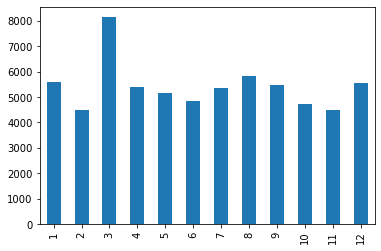

In [1073]:
df6.Month.value_counts(sort=False).plot(kind='bar')

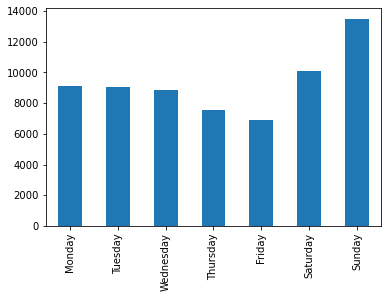

In [1074]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df6.weekday_name.value_counts(sort=False).loc[day_order].plot(kind='bar')

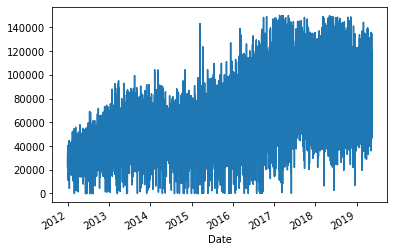

In [1075]:
df6['Price/Sqmt'].plot()

In [1076]:
df6.head()

,Price/Sqmt,Transaction_ID,Community Name,Livable Area,Price,Year Built,Floor Plan,Facing Direction,Floor Level,Decoration,Year,Month,weekday_name
Date,,,,,,,,,,,,,
2015-05-08,38544.0,1,中关村南大街甲3号,56.30,217.0,54,2B1L,South,low,0,2015,5,Friday
2012-04-10,33667.0,2,中关村南大街甲3号,55.10,185.5,54,2B1L,South,first,0,2012,4,Tuesday
2019-04-19,91429.0,3,民族大学南路19号院,70.00,640.0,26,2B1L,South,middle,0,2019,4,Friday
2019-04-07,102752.0,4,民族大学南路19号院,98.49,1012.0,19,2B1L,South,high,0,2019,4,Sunday
2019-02-22,98847.0,5,民族大学南路19号院,60.70,600.0,28,2B1L,South,high,0,2019,2,Friday


In [1077]:
df7 = df6.rename(columns={"Price/Sqmt": "price_per_sqmt", "Transaction_ID": "transaction_id", "Community Name": "community_name", "Livable Area": 'livable_area', "Price": 'price', "Year Built": "year_built", "Floor Plan": "floor_plan", "Facing Direction": "facing_direction", "Floor Level": "floor_level", "Decoration": "decoration", "Year": "year", "Month": "month"})

In [1078]:
df7.head()

,price_per_sqmt,transaction_id,community_name,livable_area,price,year_built,floor_plan,facing_direction,floor_level,decoration,year,month,weekday_name
Date,,,,,,,,,,,,,
2015-05-08,38544.0,1,中关村南大街甲3号,56.30,217.0,54,2B1L,South,low,0,2015,5,Friday
2012-04-10,33667.0,2,中关村南大街甲3号,55.10,185.5,54,2B1L,South,first,0,2012,4,Tuesday
2019-04-19,91429.0,3,民族大学南路19号院,70.00,640.0,26,2B1L,South,middle,0,2019,4,Friday
2019-04-07,102752.0,4,民族大学南路19号院,98.49,1012.0,19,2B1L,South,high,0,2019,4,Sunday
2019-02-22,98847.0,5,民族大学南路19号院,60.70,600.0,28,2B1L,South,high,0,2019,2,Friday


In [1079]:
df7['floor_plan'].unique()

array(['2B1L', '3B1L', '3B2L', '1B1L', '2B0L', '3B0L', '1B0L', '4B1L',
       '4B2L', '2B2L', '4B0L', '5B1L', '1B2L', '3B3L', '6B1L', '6B2L',
       '5B2L', '4B3L', '5B3L', '6B3L', '4B4L', '5B4L', '6B4L', '4B5L',
       '2B3L', '7B3L', '9B0L', '8B4L', '7B2L', '5B0L'], dtype=object)

In [1088]:
df7.isnull().sum(axis=1) 

Date
2015-05-08    0
2012-04-10    0
2019-04-19    0
2019-04-07    0
2019-02-22    0
             ..
2012-04-15    0
2012-03-04    0
2012-02-26    0
2012-02-26    0
2012-01-05    0
Length: 65072, dtype: int64

In [1089]:
df7.isnull().sum(axis=0) 

price_per_sqmt      0
transaction_id      0
community_name      0
livable_area        0
price               0
year_built          0
floor_plan          0
facing_direction    0
floor_level         0
decoration          0
year                0
month               0
weekday_name        0
dtype: int64

In [1090]:
df7.isnull().sum().sum()

0

In [1080]:
df7.to_csv("df7.csv", sep=',', header=True,index=False)

In [128]:
pre_data['Decoration_Level'] = pre_data['Decoration_Level'].astype('int64')

In [135]:
pre_data = pre_data.drop(['Date', 'Year Built'], axis=1)

In [136]:
pre_data.dtypes

Price/Square Meter    float64
Housing_ID              int64
Livable Area          float64
Price                 float64
Facing_East             int64
Facing_North            int64
Facing_South            int64
Facing_West             int64
Decoration_Level        int64
Floor_Level             int64
dtype: object

In [137]:
pre_data.to_csv("prepared_data.csv", sep=',' ,index=False)

In [ ]:
# Move the response variable to left-most
final_df2 = pre_data

In [37]:
final_df2.to_csv("prepared_data.csv", sep=',', header=None,index=False)